<a href="https://colab.research.google.com/github/muhammad-ahsan12/Email_Classifier/blob/main/Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ashfakyeafi/spam-email-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): Apache 2.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 51.8MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/spam-email-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=pd.read_csv("/content/email.csv")
data.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


# Convert Category columns into numarical data assign {'ham':0,'spam':1}

In [ ]:
Encoder=LabelEncoder()
data['Category']=Encoder.fit_transform(data['Category'])

In [ ]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.value_counts('Category')

Category
0    4825
1     747
2       1
dtype: int64

# Divide the data into X and y

In [ ]:
X=data['Message']
y=data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                                      isActive:false}
Name: Message, Length: 5573, dtype: object


In [ ]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    2
Name: Category, Length: 5573, dtype: int64


# Now convert the data in to training and testing part

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3) # for 70% training and 30% testing

In [ ]:
print(X_train.shape,X_test.shape)

(3901,) (1672,)


# Clean the Data or Remove unnesessry words

In [ ]:
def clean_email_body(body):
    body = re.sub(r'<[^>]+>', '', body)
    body = re.sub(r'\W', ' ', body)
    body = re.sub(r'\s+', ' ', body)
    return body.strip().lower()

# Clean the training and testing data
X_train = X_train.apply(clean_email_body)
X_test = X_test.apply(clean_email_body)

# Transform text data to TF-IDF features for classification.

In [ ]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_feature=feature_extraction.fit_transform(X_train)
X_test_feature=feature_extraction.transform(X_test)

# y_train=y_train.astype('int')
# y_test=y_test.astype('int')

In [ ]:
print(X_train_feature)

  (0, 1972)	0.3606154119555533
  (0, 1324)	0.5875283217048054
  (0, 6346)	0.4237658162825264
  (0, 2910)	0.5875283217048054
  (1, 3764)	0.41202439917063255
  (1, 2741)	0.38226308311322066
  (1, 5587)	0.40588596863665266
  (1, 4944)	0.43564728469406455
  (1, 2986)	0.35994949323708797
  (1, 3078)	0.29865333031467683
  (1, 2909)	0.3328984893173069
  (2, 3706)	0.28428971720844326
  (2, 1719)	0.195350252039844
  (2, 4116)	0.34407617094969895
  (2, 4033)	0.3254187104690407
  (2, 5224)	0.23587773399807374
  (2, 3591)	0.2989433527110997
  (2, 5714)	0.36273363143035714
  (2, 2831)	0.38483674285767616
  (2, 3540)	0.316184856568072
  (2, 6331)	0.17918069254986752
  (2, 2276)	0.316184856568072
  (3, 5132)	0.8610920270182515
  (3, 1719)	0.5084491331545357
  (4, 3099)	0.4477700653777994
  :	:
  (3897, 5477)	0.8108837377207199
  (3897, 1972)	0.585207282849483
  (3898, 1929)	0.6395353379871832
  (3898, 5880)	0.5712058543503891
  (3898, 3062)	0.331168369136131
  (3898, 1078)	0.3937587265130472
  (3899,

# Train Model

In [ ]:
models = {
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB(),
}

In [ ]:
accuracy_scores = []
model_names = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_feature.toarray(), y_train)
    y_pred = model.predict(X_test_feature.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(name)
    print(f"Accuracy of {name}: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Training MultinomialNB...
Accuracy of MultinomialNB: 0.9688995215311005
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       1.00      0.77      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
[[1448    0]
 [  52  172]]

Training GaussianNB...
Accuracy of GaussianNB: 0.8851674641148325
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1448
           1       0.55      0.86      0.67       224

    accuracy                           0.89      1672
   macro avg       0.76      0.87      0.80      1672
weighted avg       0.92      0.89      0.90      1672

Confusion Matrix:
[[1288  160]
 [  32  192]]



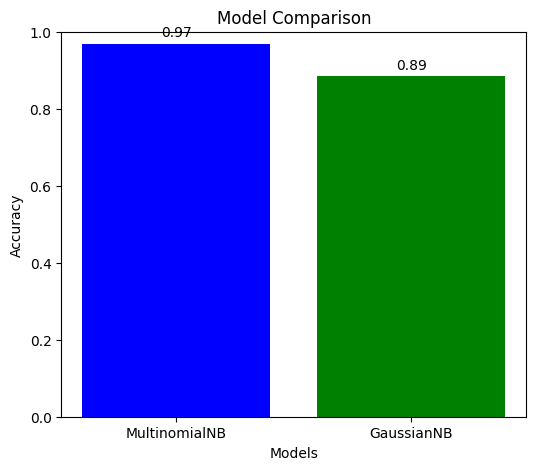

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is a value between 0 and 1
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Function for checking wheather email is Spam or Ham

In [ ]:
def send_mail(mail):
  extract_mail=feature_extraction.transform(mail)
  prediction=model.predict(extract_mail.toarray())
  return prediction


In [ ]:
input_mail=["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
prediction=send_mail(input_mail)
if prediction==1:
  print("the email is spam")
else:
  print("the email is ham")

the email is ham
